In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
df = pd.read_csv('linear_data.csv')
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [5]:
df2 = pd.read_csv('nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


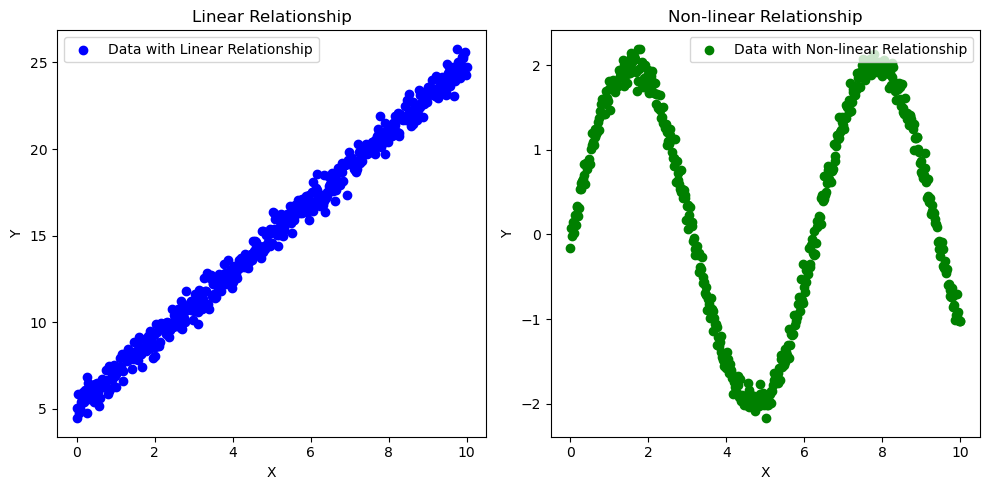

In [6]:
#linear
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df.x, df.y, color='blue', label='Data with Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

#non-linear
plt.subplot(1, 2, 2)
plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

# Correlation coefficients

In [7]:
correlation_linear = np.corrcoef(df.x, df.y)
print("Correlation coefficient for linear relationship:", correlation_linear)

Correlation coefficient for linear relationship: [[1.         0.99643985]
 [0.99643985 1.        ]]


In [17]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [9]:
correlation_nonlinear = np.corrcoef(df2.x, df2.y)[0, 1]
print("Correlation coefficient for non-linear relationship:", correlation_nonlinear)

Correlation coefficient for non-linear relationship: -0.06573583283905132


In [10]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


# Linear

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [10]:
reg1 = LinearRegression()

In [12]:
reg1.fit(df[['x']] , df.y)

LinearRegression()

In [15]:
reg1.score(df[['x']] , df.y)

0.9928923730526016

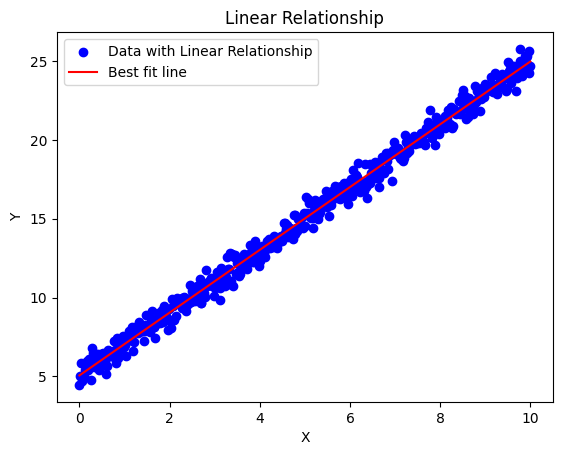

In [16]:
plt.scatter(df[['x']], df.y, color='blue', label='Data with Linear Relationship')
plt.plot(df[['x']], reg1.predict(df[['x']]), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

# Non Linear Data df2

In [17]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [13]:
reg2 = LinearRegression()

In [14]:
reg2.fit(df2[['x']], df2.y)

LinearRegression()

In [15]:
reg2.score(df2[['x']] , df2.y)

0.004321199719043767

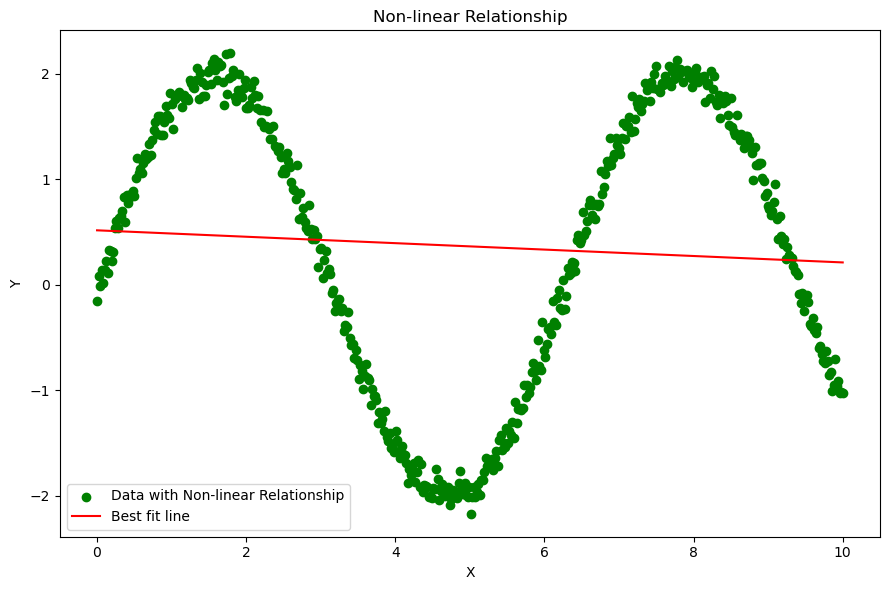

In [16]:
plt.figure(figsize=(9,6))
plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.plot(df2[['x']], reg2.predict(df2[['x']]), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

# Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures(degree=6) # polynomial regression with degree 2
X_poly = poly.fit_transform(df2[['x']])

In [19]:
X_poly.shape

(500, 7)

In [20]:
pd.DataFrame(X_poly)

,0,1,2,3,4,5,6
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07,4.145498e-09
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07,4.721981e-08
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06,2.653119e-07
...,...,...,...,...,...,...,...
495,1.0,9.91984,98.403219,976.144159,9.683194e+03,9.605573e+04,9.528574e+05
496,1.0,9.93988,98.801210,982.072144,9.761679e+03,9.702992e+04,9.644657e+05
497,1.0,9.95992,99.200003,988.024080,9.840641e+03,9.801199e+04,9.761916e+05
498,1.0,9.97996,99.599600,994.000016,9.920080e+03,9.900200e+04,9.880360e+05


In [21]:
reg_poly = LinearRegression()

In [22]:
reg_poly.fit(X_poly, df2.y) # all data

LinearRegression()

In [23]:
reg_poly.score(X_poly, df2.y)

0.9930624844497346

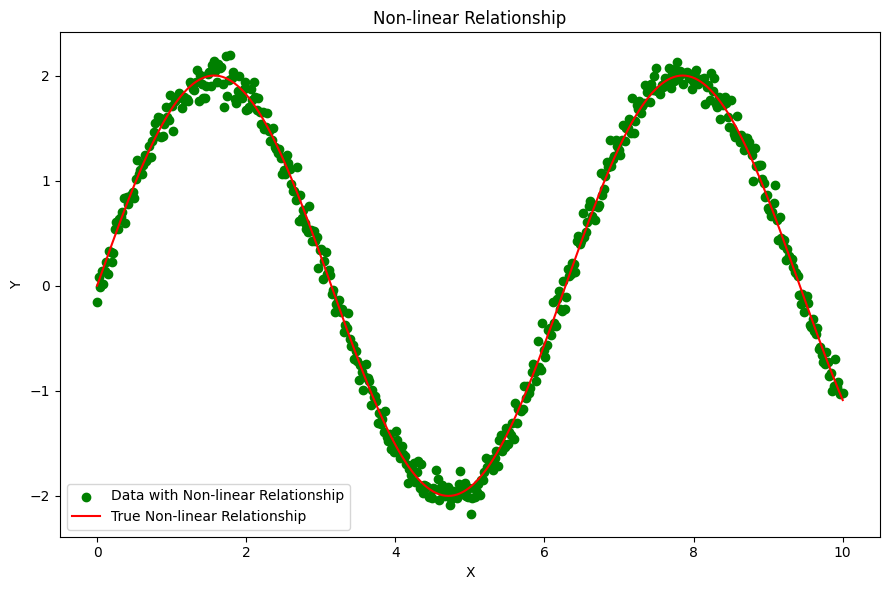

In [29]:
plt.figure(figsize=(9,6))
plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.plot(df2.x, 2 * np.sin(df2.x), color='red', label='True Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()
plt.tight_layout()
plt.show()

# Testing Overfit or Bestfit

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(X_poly, df2.y, test_size=0.25, random_state=0)

In [26]:
xtrain.shape

(375, 7)

In [27]:
reg_poly.fit(xtrain, ytrain)

LinearRegression()

In [28]:
reg_poly.score(xtrain, ytrain) # train data -> training accuracy

0.9932966451789851

In [29]:
reg_poly.score(xtest, ytest) # unseen/new data -> testing accuracy

0.9921870558220874

# model is best fit